# Wind Data EDA

In [1]:
# Specify which computer: 'gdrive', 'local', or 'work'
path_source = 'gdrive'

Imports

In [2]:
if path_source == 'gdrive':
  from IPython.display import clear_output
  !pip install cartopy
  !pip install -U kaleido # need this for saving plotly to png
  clear_output()

In [ ]:
import pandas as pd 
import numpy as np
import os 
import datetime
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
import plotly.express as px

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import dotenv

Set paths:

In [ ]:
if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  gdrive_path = '/content/gdrive/MyDrive/Classes/W210_capstone'
  env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  gdrive_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone'
  env_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/MyDrive/.env'

elif path_source == 'work':
  gdrive_path = '/Users/trevorjohnson/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone'
  env_path = '/Users/trevorjohnson/trevorj@berkeley.edu - Google Drive/My Drive/.env'
  

wind_path = os.path.join(gdrive_path, 'W210 Capstone/Data/wind')
plotly_out = os.path.join(gdrive_path, 'W210_capstone/plotly_gif')
os.chdir(os.path.join(gdrive_path, 'JLPS_capstone_project/data_clean_scripts/wind'))

Mapbox token:

In [ ]:
from dotenv import dotenv_values
api_keys = dotenv_values(env_path)
mapbox_key = api_keys['mapbox']
px.set_mapbox_access_token(open(mapbox_key).read())

In [ ]:
df = pd.read_parquet(wind_path)
df

,lat,lon,ZCTA10,u,v,wdir,wspd,year_month
0,37.465,-117.936,89010,0.815439,0.606772,36.653091,1.016421,199801
1,35.396,-116.322,89019,0.282826,0.555248,63.007133,0.623130,199801
2,36.161,-116.139,89060,-0.143215,0.582321,103.816978,0.599673,199801
3,35.957,-115.897,89061,0.381607,0.403891,46.624981,0.555654,199801
4,39.520,-120.032,89439,0.947113,1.138490,50.242836,1.480940,199801
...,...,...,...,...,...,...,...,...
449070,39.061,-120.210,96145,-0.003084,0.415663,90.425072,0.415674,202012
449071,39.149,-120.248,96146,-0.003084,0.415663,90.425072,0.415674,202012
449072,39.236,-120.062,96148,-0.003084,0.415663,90.425072,0.415674,202012
449073,38.732,-120.033,96150,-0.139579,0.199844,124.932045,0.243762,202012


In [ ]:
# df['date'] = df['year_month'].map(lambda x: datetime.datetime.strptime(x, "%Y%m"))
df['date'] = df['year_month'].map(lambda x: x[:4] + '-' + x[4:])

# Plotly Map
- This package does not support putting arrows out of the box to signify wind direction. 
- But the color can signify wind direction
- Plotly won't render in github, so here's a screenshot of this plotting option. You can click, drag, and hover on points to get wind info. The color represents wind direction. And dot size represents speed. Probably not the best data representation, but a simple way to do it with this package. 

In [ ]:
df_small = df[df['year_month'] == '200702']
fig = px.scatter_mapbox(df_small, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  size_max=15, zoom=5)
fig.show()

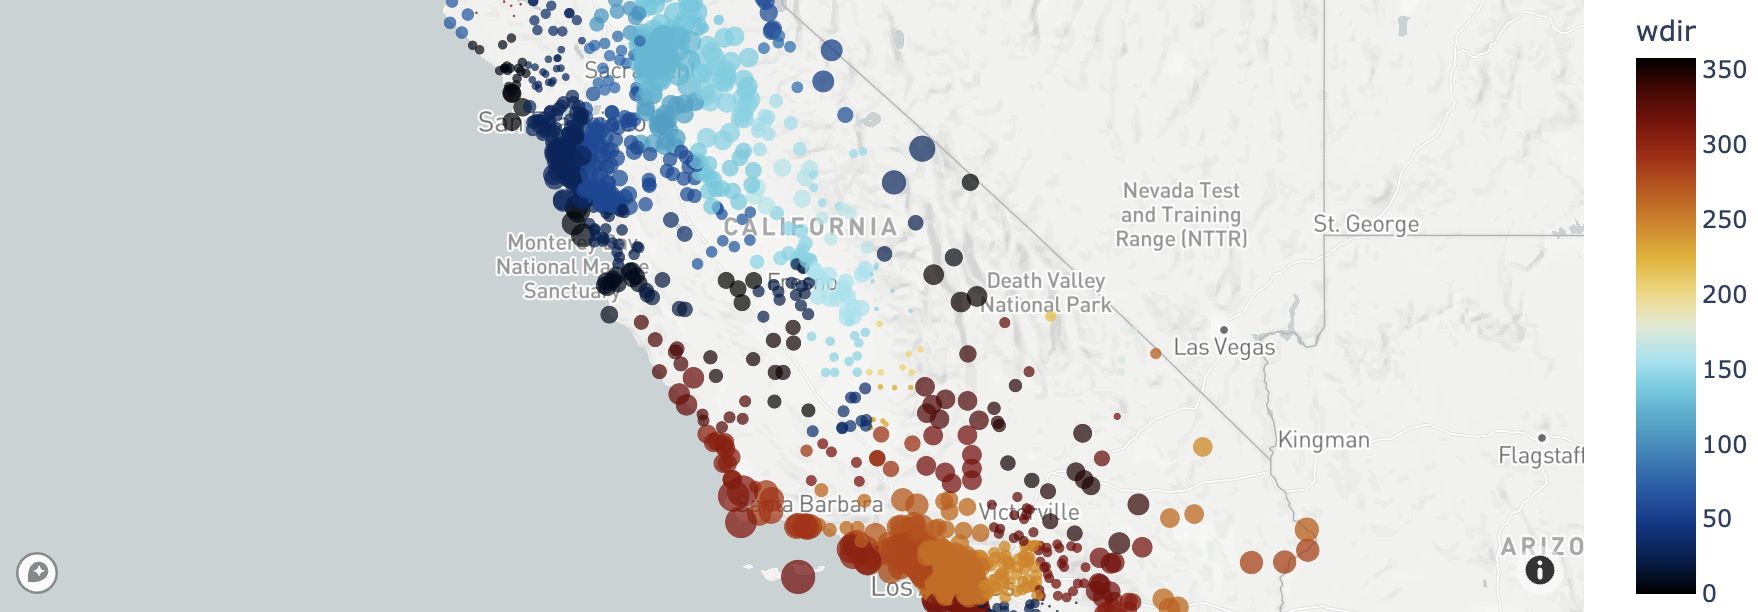

In [ ]:
from IPython.display import Image
Image('plotly_wind_map.png')

Animation

In [ ]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  # color_continuous_scale=px.colors.cyclical.Edge, 
  range_color=[0, 360],
  animation_frame='date',
  size_max=15, zoom=5, 
  width=700, height=800)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Save images as gif to put in gslides.

In [ ]:
all_dates = list(set(df[df.date.str.count('2010-')>0]['date'].to_list()))
# all_dates = list(set(df.date.to_list()))

for date_i in tqdm(all_dates):
  df_plot = df[df.date == date_i]

  fig = px.scatter_mapbox(df_plot, lat="lat", lon="lon", 
    color="wdir", size="wspd",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    range_color=[0, 360],
    title=f'Date: {date_i}',
    size_max=15, zoom=5, 
    width=700, height=800)

  fig.write_image(os.path.join(plotly_out, f'plot_{date_i}.png'))

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
 
# Open the images
frames = []
files = os.listdir(plotly_out)
files.sort()
files = [os.path.join(plotly_out, i) for i in files]
for i in files:
  new_frame = Image.open(i)
  frames.append(new_frame)

# Save into a GIF file that loops forever
gif_file = os.path.join(plotly_out, 'gif1.gif')
frames[0].save(gif_file, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [ ]:
from IPython.display import Image
Image(filename=gif_file)

Output hidden; open in https://colab.research.google.com to view.

# Matplotlib map
- This method keeps crashing my google colab... And the cartopy package won't install on my mac m1. So I may have to just go with the plotly version. 

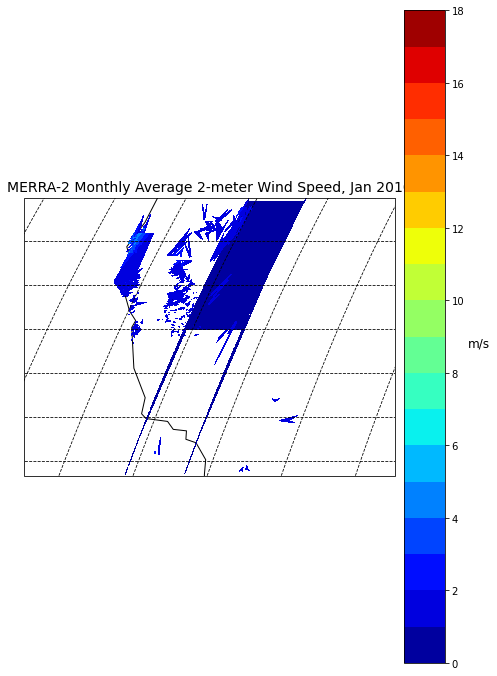

In [ ]:
df_small = df[df.date == '2010-01']
lon, lat = np.meshgrid(df_small.lon, df_small.lat)
ws_direction = np.arctan2(df_small['v'],df_small['u'])

ws_daily_avg = np.nanmean(df_small.wspd, axis=0)
ws_daily_avg = df_small.wspd

ws = np.array(np.sqrt(df_small['u']**2+df_small['v']**2))
wspd2 = []
for i,val in enumerate(df_small.wspd):
  x = np.zeros(df_small.shape[0])
  x[i] = val 
  wspd2.append(x)

fig = plt.figure(figsize=(8,15)) 
ax = plt.axes(projection=ccrs.Robinson())

# zoom in to CA
ax.set_extent([-124.4, -114.2, 32.5, 42], crs=ccrs.PlateCarree())

ax.coastlines(resolution='110m', linewidth=1)
ax.gridlines(linestyle='--', color='black')

clevs = np.arange(0, 19, 1)
# plt.contourf(lon, lat, ws_daily_avg, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#plt.contourf(lon, lat, ws, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.contourf(lon, lat, wspd2, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)


plt.title('MERRA-2 Monthly Average 2-meter Wind Speed, Jan 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [ ]:
ws2.dim

AttributeError: 'list' object has no attribute 'dim'

TypeError: Input z must be 2D, not 1D

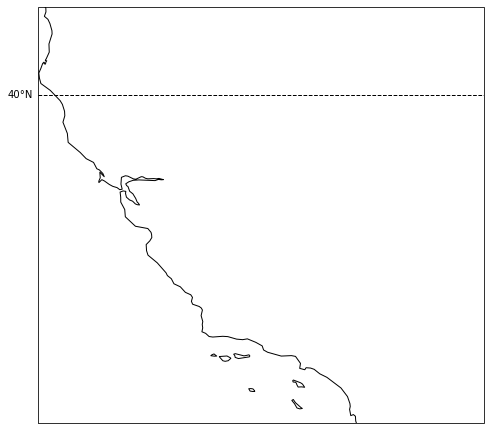

In [ ]:
df_small = df[df.date == '2010-01']
lon, lat = np.meshgrid(df_small.lon, df_small.lat)
ws_direction = np.arctan2(df_small['v'],df_small['u'])

ws_daily_avg = np.nanmean(df_small.wspd, axis=0)
ws_daily_avg = df_small.wspd

ws = np.array(np.sqrt(df_small['u']**2+df_small['v']**2))
ws2 = []
for i,val in enumerate(df_small.wspd):
  x = np.zeros(df_small.shape[0])
  x[i] = val 
  ws2.append(x)

ws2 = np.meshgrid(ws, ws)

# plot
fig = plt.figure(figsize=(8,15)) 
ax = plt.axes(projection=ccrs.PlateCarree())

# zoom in to CA
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
ax.set_extent([-124.4, -114.2, 32.5, 42], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# wind speed
clevs = np.arange(0,14.5,1)
#plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.contourf(lon, lat, ws, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Monthly Average 2-meter Wind Speed, Jan 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# wind vectors
qv = plt.quiver(lon, lat, df_small['u'], df_small['v'], scale=420, color='k')

Trying to plot the houly data

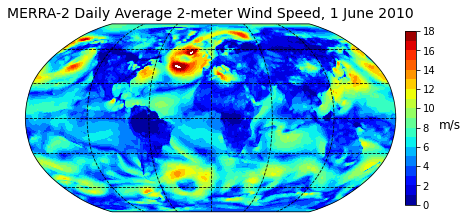

In [ ]:
from netCDF4 import Dataset
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/hourly/MERRA2_200.tavg1_2d_slv_Nx.20001231.nc4'), mode='r')

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

clevs = np.arange(0,19,1)
plt.contourf(lon, lat, ws_daily_avg, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# fig.savefig('MERRA2_2m_ws.png', format='png', dpi=120)

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


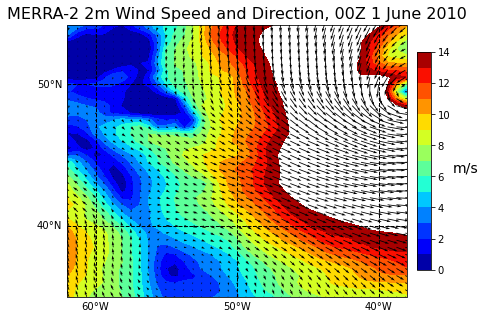

In [ ]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-62,-38,35,54])
ax.coastlines(resolution="50m",linewidth=1)
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

In [ ]:
# Check out the data feeding this
print(lon)
print("\nndim:")
print(lon.ndim)
# it's also of "masked_array" type

[[-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 ...
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]]

ndim:
2


ws is a very diff data object than i thought

In [ ]:
ws[0,:,:]

masked_array(
  data=[[1.6832940578460693, 1.6913090944290161, 1.6994885206222534, ...,
         1.6603457927703857, 1.66781485080719, 1.675499439239502],
        [1.903086543083191, 1.9062025547027588, 1.9089640378952026, ...,
         1.8952761888504028, 1.8980985879898071, 1.900482177734375],
        [2.5242483615875244, 2.5190305709838867, 2.5142979621887207, ...,
         2.5389626026153564, 2.5338306427001953, 2.5291762351989746],
        ...,
        [6.860218524932861, 6.876913070678711, 6.892567157745361, ...,
         6.820282459259033, 6.832030296325684, 6.846511363983154],
        [5.527947902679443, 5.540529727935791, 5.554105281829834, ...,
         5.4964728355407715, 5.505919933319092, 5.516500473022461],
        [5.074198246002197, 5.090591907501221, 5.107851505279541, ...,
         5.028520584106445, 5.043224811553955, 5.057738780975342]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, 

# Wind Direction EDA
- East/West wind speed is cyclical. It blows westward during the winter, and eastward during the summer. North/South is not as cyclical. 
- Overall wind speed is also cyclical. The wind seems to pick up in the summer months, but slow down in winter months. 

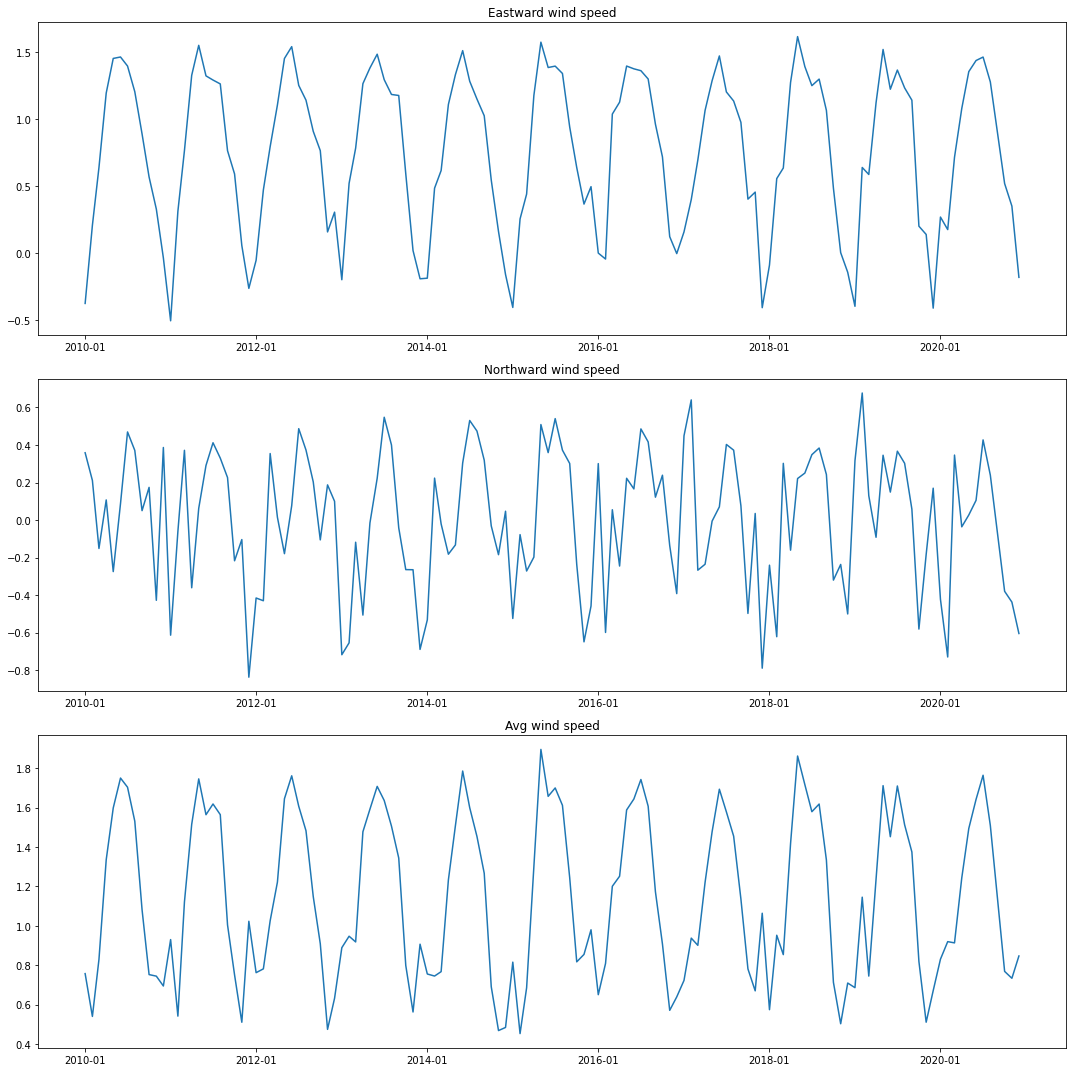

In [ ]:
df_plot = df.groupby('date').agg(**{
    'u': ('u', 'mean'), 
    'v': ('v', 'mean'), 
    'wdir': ('wdir', 'mean'), 
    'wspd': ('wspd', 'mean')})\
    .reset_index()
df_plot['date'] = df_plot.date.map(lambda x: datetime.datetime.strptime(x, '%Y-%m'))
df_plot = df_plot[df_plot['date'] >= '2010-01-01']

fig, ax = plt.subplots(3,1, figsize=(15,15))
myFmt = DateFormatter("%Y-%m")

ax[0].plot(df_plot.date, df_plot.u)
ax[0].set_title('Eastward wind speed')
ax[0].xaxis.set_major_formatter(myFmt)

ax[1].plot(df_plot.date, df_plot.v)
ax[1].set_title('Northward wind speed')
ax[1].xaxis.set_major_formatter(myFmt)

ax[2].plot(df_plot.date, df_plot.wspd)
ax[2].set_title('Avg wind speed')
ax[2].xaxis.set_major_formatter(myFmt)

fig.tight_layout()
print('')